In [1]:
n <- 75 # number of patients
y <- 6  # number of times the new method fails
n.sample <- 1000

p <- seq(0, 1, 1/n.sample) 

The probability distribution of $y$, the number of times the new method fails to detect the disease is
$$\text{Binom}(y|n=75,p=0.15)$$

In [2]:
# b) frequentist estimator (unbiased)
p_F <- y / n

cat(paste("The frequentist estimator of the failure probability of the new method is:", p_F, '\n'))

The frequentist estimator of the failure probability of the new method is: 0.08 


In [3]:
# mean and variance of the prior Beta(a, b)
p_0 <- 0.15
stdev <- 0.14^2

# parameters of the prior
a <- p_0 * (p_0 - p_0^2 - stdev) / stdev   
b <- (p_0 - 2*p_0^2 - stdev + p_0^3 + p_0*stdev) / stdev

In [4]:
# parameters of the posterior distribution Beta(a_2, b_2)
a_2 <- a + y 
b_2 <- b + n - y

# posterior distribution
posterior <- dbeta(p, a_2, b_2)

In [6]:
# mean and variance of the posterior
mean <- integrate(function(p) dbeta(p, a_2, b_2) * p, 0, 1)	

second_moment <- integrate(function(p) dbeta(p, a_2, b_2) * p^2, 0, 1)
variance <- second_moment$value - (mean$value)^2
                           
sigma_1 <- mean$value - sqrt(variance)
sigma_2 <- mean$value + sqrt(variance) 

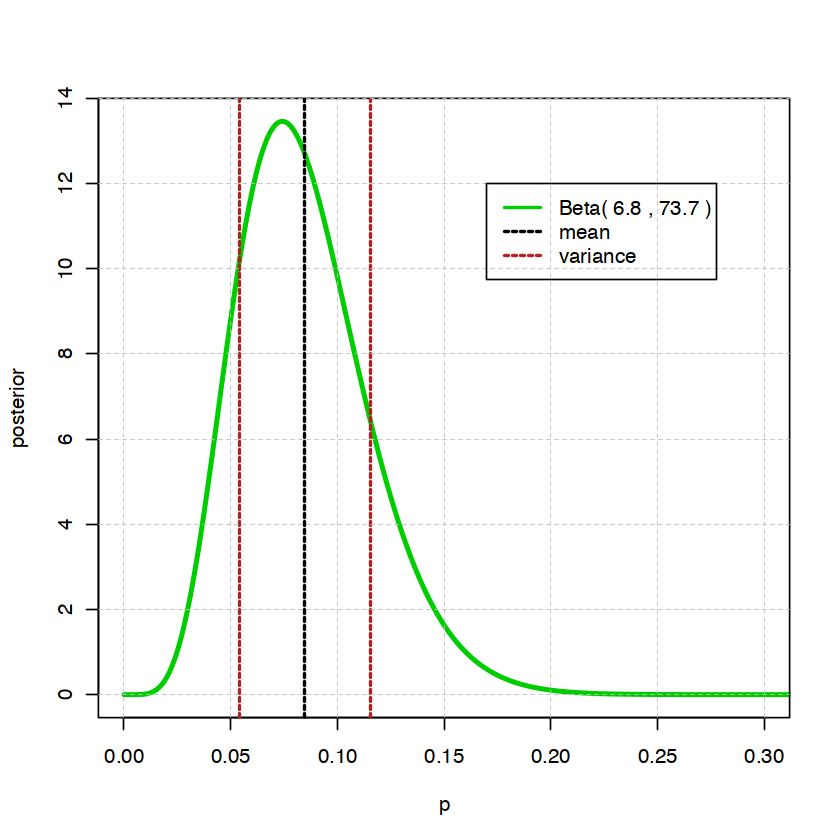

In [8]:
# plot the posterior
plot(p, posterior,
	type = 'l', lwd = 3,
	col = "green3",
	xlim = c(0, 0.3))
abline(v = mean$value,
	lty = 2, lwd = 2,
	col = "black")
abline(v = sigma_1,
	lty = 2, lwd = 2,
	col = "firebrick")
abline(v = sigma_2,
	lty = 2, lwd = 2,
	col = "firebrick")
grid(nx = NULL, ny = NULL,
	lty = 2, lwd = 0.5,
	col = "gray")
legend(0.17, 12,
	legend = c(paste("Beta(", round(a_2, 1), ",", round(b_2, 1), ")"), "mean", "variance"),
	col = c("green3", "black", "firebrick"),
	lty = c(1, 2, 2), lwd = 2, cex = 1)

In [9]:
# c) one-side hypothesis test (bayesian approach)

Level of significance required:
$$\alpha = 5\%$$

Null hypothesis:
$$H_0 : p \geq 0.15$$

Evaluate the posterior probability of the null hypothesis:
$$P(H_0 : p \geq 0.15|y) = \int_{0.15}^1 P(p|y) \, dp$$

In [10]:
test <- integrate(function(p) dbeta(p, a_2, b_2), 0.15, 1)

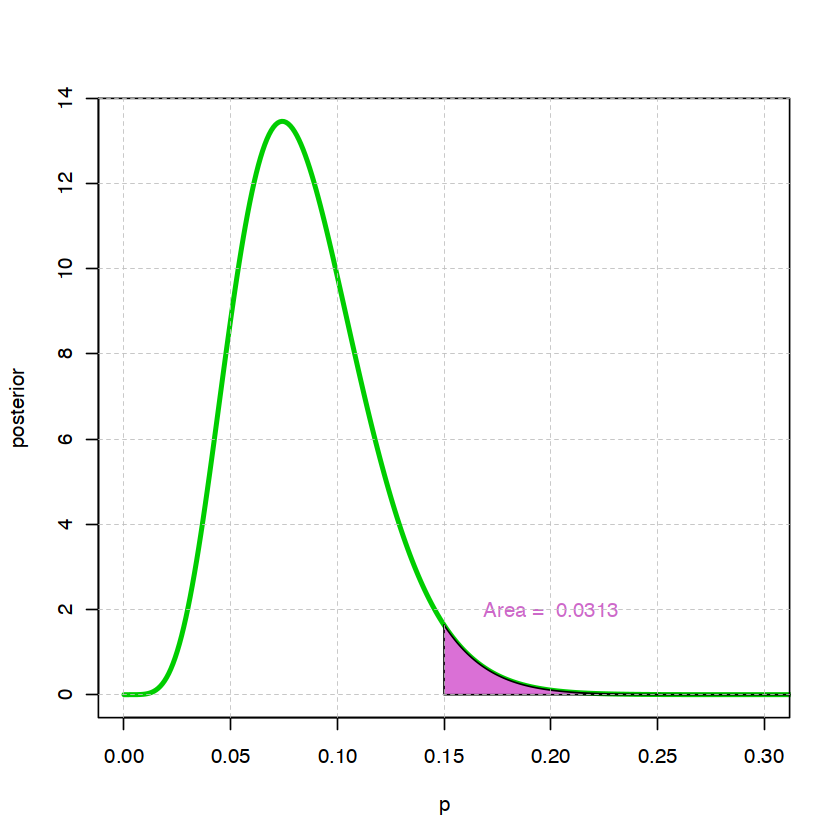

In [13]:
# plot
plot(p, posterior,
	type = 'l', lwd = 3,
	col = "green3",
	xlim = c(0, 0.3))
polygon(c(p[p >= p_0], p_0),
	c(posterior[p >= p_0], 0),
        col = "orchid",
        border = 1,
        text(x = 0.2, y = 2, paste("Area = ", round(test$value, 4)), col = "orchid3"))
grid(nx = NULL, ny = NULL,
	lty = 2, lwd = 0.5,
	col = "gray")

The result, 3.1%, is lower than $\alpha$, so we reject the null hypothesis: the new test is better than the old one 

In [14]:
# d) one-side hypothesis test (frequentist approach)
# null distribution
null <- dbinom(0:30, n, p_0)

Evaluate if the p-value is lower than $\alpha$
$$\text{p-value} = \sum_i P(y_i|p)$$

In [15]:
p.value <- 0 
for(i in 0:y){
	p.value <- p.value + dbinom(i, n, p_0)
}

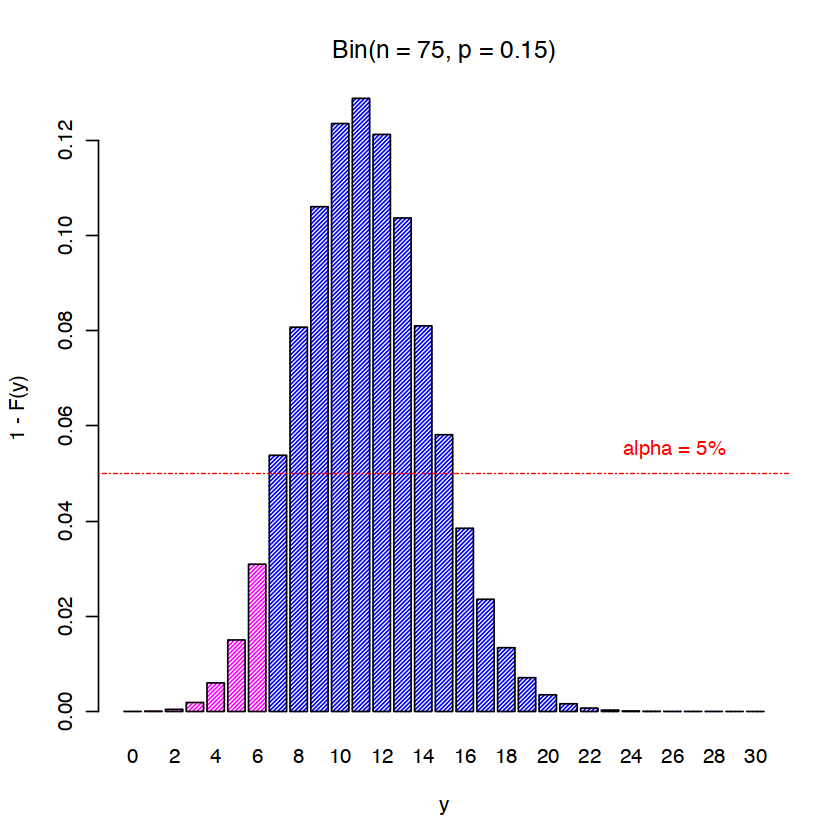

In [19]:
# plot
barplot(null, names = 0:30,
	col = c(rep("magenta", 7), rep("blue", 24)), angle = 45, density = 40,
	xlab = "y", ylab = "1 - F(y)",
	main = "Bin(n = 75, p = 0.15)")
abline(h = 0.05,
	col = "red", lwd = 0.8, lty = 4,
	text(x = 32, y = 0.055, label = "alpha = 5%", col = "red"))

In [23]:
cat(paste("The p-value is", round(p.value*100, 1), "%, and it's greater than 5%, so we accept the null hypothesis"))

The p-value is 5.4 %, and it's greater than 5%, so we accept the null hypothesis

Since the p-value and $\alpha$ are very similar, we can affirm that the test is not very strong